# Logistic Regression
# To classify whether the passenger will survive or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as r
from IPython.display import clear_output

In [204]:
data=pd.read_csv("datasets/titanic.csv")


In [205]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# selecting the features and the target variable

In [4]:
features=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
target_Y=data['Survived']

In [5]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## checking if there are any nan values in the dataset


In [6]:
features.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# as the are 2 rows having nan values in the Embarked Feature, so we'll drop the rows with value of Embarked as nan

In [7]:
target_Y=target_Y[features['Embarked'].isna()==False]
features= features[features['Embarked'].isna()==False]
print(features.shape)
print(target_Y.shape)

(889, 7)
(889,)


#  now nan values from Embarked column are removed.
# now its time to deal with Age column.
## as 177 rows have age value as nan,  dropping 177 rows will result in huge data loss, thus in this case we will put the mean age in case of nan entries

In [8]:
features.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [9]:
for i in range(len(features)):
    if not (features['Age'].iloc[i] >= min(features['Age']) and features['Age'].iloc[i] <= max(features['Age'])):
        features['Age'].iloc[i]= features['Age'].mean()

C:\Users\Srishti Vishnoi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# now there is no nan value in the dataset

In [10]:
features.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
features.shape

(889, 7)

In [12]:
target_Y.shape

(889,)

In [13]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


# as two of our columns are having textual data- sex and Embarked, we'll label encode them

In [14]:
def LabelEncoder(array):
    unique_val=list(set(array))
      
    for i in range(len(array)) :
        array.iloc[i] = unique_val.index(array.iloc[i])

In [15]:
LabelEncoder(features['Sex'])
LabelEncoder(features['Embarked'])

C:\Users\Srishti Vishnoi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


## converting features and target into numpy arrays

In [17]:
features=np.array(features)
target_Y=np.array(target_Y).reshape(len(target_Y),1)
print(features.shape)
print(target_Y.shape)

(889, 7)
(889, 1)


In [133]:
weight0 =np.random.randn(7,1)
bias0=np.random.randn()

In [178]:
def linear_reg(m,x,c):
    a=-(np.dot(x,m)+c)    
    a=np.array(a).reshape(len(a),1)
    return a

def sigmoid(m,x,c):
     return 1/(1+np.exp(-linear_reg(m,x,c))) 
    
def error_cost(m,x,c,y):
    y_predicted=sigmoid(m,x,c)
    
    c=7.40208782e-7
    
    l= (-y*np.log(y_predicted) - (1-y)*np.log(1-y_predicted))
    return np.mean(l)

def derivative_wrt_weights(m,x,c,y):
    return (np.mean( y-(sigmoid(m,x,c))*x ,axis=0)).reshape(len(x.T),1)
def derivative_wrt_bias(m,x,c,y):
    return np.mean( y-sigmoid(m,x,c) ,axis=0)
       
def accuracy(m,x,c,y):
    y_predicted=sigmoid(m,x,c)
    y_predicted[y_predicted>=0.5]=1
    y_predicted[y_predicted<0.5]=0
    correct=len(y_predicted[y_predicted==y])
    return correct/len(y)

Error : 13.304419492490169
Accuracy is : 0.6242969628796401


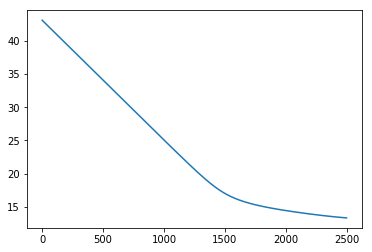

In [185]:
num_of_iteration = 2500
cost=[]
weights=weight0
bias=bias0
lr = 0.0015
for i in range(0,num_of_iteration):
    del_weights=derivative_wrt_weights(weights,features,bias,target_Y)
    del_bias=derivative_wrt_bias(weights,features,bias,target_Y)
    weights=weights-lr*del_weights
    bias = bias - lr*del_bias
    clear_output(True)
    cost.append(error_cost(weights,features,bias,target_Y))
    print('Error :',error_cost(weights,features,bias,target_Y))
    
print("Accuracy is :", accuracy(weights,features,bias,target_Y))
plt.plot(cost)
plt.show()

In [200]:
print("ACCURACY ON TRAINING DATA :",accuracy(weights,features,bias,target_Y)*100,"%")

ACCURACY ON TRAINING DATA : 62.429696287964006 %
